<p>
 Reflectivity is the limit value of reflectance when the sample is thick. It is the intrinsic reflection of the surface.

Reflectance is a fraction of electromagnetic power reflected form material or surface. Reflectivity is a property of a material.
</p>

In [1]:
%%html
<!--- html styling for Jupyter Dark Theme---!>
<style>
.CodeMirror-focused .CodeMirror-selected { background: none; }
.CodeMirror-focused .CodeMirror-selectedtext { background: #FF0088; } 
.CodeMirror-selected { background:  grey; }
</style>

In [2]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import scipy
from scipy.stats import norm
from scipy.interpolate import interp1d

In [3]:
project_dir = r'C:\Users\sarth\projects\LY_Analytic_Model';

In [4]:
R_SiPM_measured_df = pd.read_csv(path.join(project_dir, 'Data','sipm_hr1_processed.txt'), sep = '\t')  ## 'Data' is the name of the folder containing Data files

# R_SiPM_measured_df['R'] = [int(value)/100 for value in R_SiPM_measured_df['R']]

R_SiPM_measured_df['R'] = R_SiPM_measured_df['R']/100

In [5]:
# R_SiPM_measured_df['R']

In [6]:
R_SiPM_alberto_df = pd.read_csv(path.join(project_dir, 'Data','aberto_data','all_data reflectance LAr_NUV-HD-Cryo.txt'), sep = '\t') 
# R_SiPM_alberto_df['Wavelength']
R_SiPM_alberto_df

,Wavelength,00,05,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90
0,120,0.223771,0.223771,0.245110,0.336398,0.218952,0.315743,0.318393,0.307272,0.273077,0.162777,0.219174,0.198527,0.148674,0.211102,0.096036,0.172565,0.238515,0.245201,0.612497
1,121,0.322563,0.322563,0.339148,0.275397,0.274180,0.209582,0.248992,0.233693,0.171335,0.192117,0.249052,0.115087,0.213866,0.131923,0.138496,0.221669,0.274734,0.328203,0.624697
2,122,0.304593,0.304593,0.266666,0.218437,0.324811,0.254141,0.192690,0.179321,0.206848,0.261570,0.165466,0.163046,0.193637,0.089397,0.194755,0.234298,0.299509,0.365840,0.499060
3,123,0.211054,0.211054,0.221690,0.316602,0.222672,0.314748,0.284943,0.268388,0.273345,0.206532,0.123197,0.217140,0.107925,0.155315,0.198528,0.174245,0.227023,0.419057,0.482521
4,124,0.292870,0.292870,0.319177,0.288760,0.229471,0.222495,0.274199,0.264566,0.207083,0.127183,0.198032,0.174792,0.096439,0.187180,0.136681,0.088707,0.129157,0.377783,0.527782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,996,0.082109,0.082109,0.082233,0.084682,0.095102,0.119341,0.155678,0.188851,0.196364,0.164986,0.110392,0.098160,0.169158,0.232005,0.245212,0.234650,0.195128,0.178491,0.404532
877,997,0.082112,0.082112,0.082369,0.085201,0.096162,0.120824,0.157091,0.189556,0.196005,0.163766,0.109349,0.098845,0.170501,0.232336,0.244811,0.233469,0.192613,0.177821,0.409205
878,998,0.082166,0.082166,0.082554,0.085765,0.097253,0.122316,0.158487,0.190230,0.195617,0.162536,0.108331,0.099563,0.171830,0.232651,0.244400,0.232266,0.190102,0.177322,0.413960
879,999,0.082269,0.082269,0.082788,0.086374,0.098376,0.123815,0.159865,0.190873,0.195202,0.161296,0.107338,0.100312,0.173145,0.232949,0.243980,0.231041,0.187595,0.176996,0.418785


<h3 style = 'color:orange'> Get Reflectance value for 7 degree incidence by interpolating along rows. </h3>

In [7]:
# R_SiPM_alberto_df = pd.read_csv(path.join(project_dir, 'Data','aberto_data','all_data reflectance LAr_NUV-HD-Cryo.txt'), sep = '\t') 
chosen_wavelength = 7
value_list = []
angle_list = np.arange(0,95, 5)
for row_index in range( R_SiPM_alberto_df.shape[0] ):
    R_value_single_wavelength = R_SiPM_alberto_df.iloc[row_index,1:]
    interpolate_func = interp1d(angle_list, R_value_single_wavelength)
    interpolate_value = interpolate_func(chosen_wavelength)
    value_list.append(float(interpolate_value))

R_SiPM_alberto_df.insert(3, str(chosen_wavelength), value_list, False)

In [8]:
## 5 and 10 degrees and 5 nm slit 

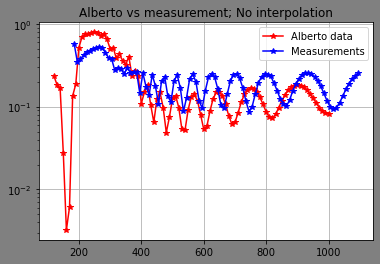

In [9]:
fig1 = plt.figure()
ax1 = plt.axes()

ax1.plot(R_SiPM_alberto_df['Wavelength'][0::10], ((R_SiPM_alberto_df['05'] + R_SiPM_alberto_df['10'])/2)[0::10], marker = '*', color = 'red', label = 'Alberto data' )
ax1.plot(R_SiPM_measured_df['Wavelength'][::10], R_SiPM_measured_df['R'][::10], marker = '*', color = 'blue', label = 'Measurements')
ax1.set_yscale('log')
ax1.grid()
fig1.set_facecolor('grey')
ax1.set_title('Alberto vs measurement; No interpolation')
ax1.legend()

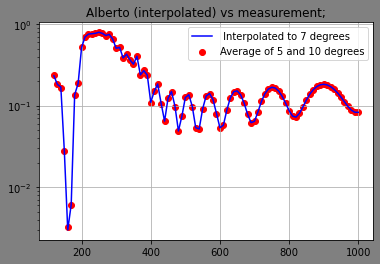

In [10]:
%matplotlib inline

fig5 = plt.figure()
ax5 = plt.axes()
ax5.scatter(R_SiPM_alberto_df['Wavelength'][0::10], ((R_SiPM_alberto_df['05'] + R_SiPM_alberto_df['10'])/2)[0::10], color = 'red', label = 'Average of 5 and 10 degrees' )
ax5.plot(R_SiPM_alberto_df['Wavelength'][0::10], R_SiPM_alberto_df['7'][0::10], color = 'blue', label = ' Interpolated to 7 degrees ')
ax5.set_yscale('log')
ax5.grid()
fig5.set_facecolor('grey')
ax5.set_title('Alberto (interpolated) vs measurement;')
ax5.legend()

<h4 style = 'color: orange'> Making Smooth functions </h4>

In [11]:
# smoothing

# R_SiPM_alberto_7_5_degrees = (R_SiPM_alberto_df['05'] + R_SiPM_alberto_df['10'])/2

# R_SiPM_alberto_inter_func = interp1d(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_7_5_degrees)

R_SiPM_alberto_7_inter_func = interp1d( R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['7'] )
R_SiPM_measured_inter_func = interp1d( R_SiPM_measured_df['Wavelength'], R_SiPM_measured_df['R'] )

wavelength_vector = np.arange(240, 1000, 5)

R_SiPM_alberto_7_smooth = R_SiPM_alberto_7_inter_func(wavelength_vector)
R_SiPM_measured_smooth = R_SiPM_measured_inter_func(wavelength_vector)


## 5 and 10 degree function probably not that relevant anymore. comment out?

R_SiPM_alberto_05_inter_func = interp1d(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['05'])
R_SiPM_alberto_10_inter_func = interp1d(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['10'])

R_SiPM_alberto_05_smooth = R_SiPM_alberto_05_inter_func(wavelength_vector)
R_SiPM_alberto_10_smooth = R_SiPM_alberto_10_inter_func(wavelength_vector)



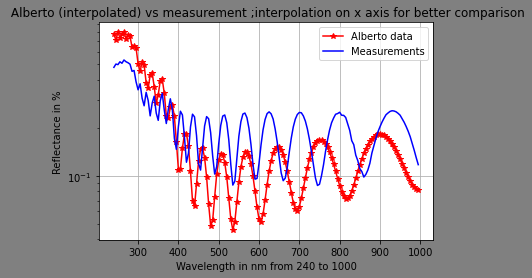

In [12]:
# %matplotlib qt
fig2 = plt.figure()
ax2 = plt.axes()
ax2.plot(wavelength_vector, R_SiPM_alberto_7_smooth, marker = '*', color = 'red', label = 'Alberto data' )
ax2.plot(wavelength_vector, R_SiPM_measured_smooth, color = 'blue', label = 'Measurements' )
ax2.set_yscale('log')
fig2.set_facecolor('grey')
ax2.set_title(' Alberto (interpolated) vs measurement ;interpolation on x axis for better comparison')
ax2.set_xlabel('Wavelength in nm from 240 to 1000')
ax2.set_ylabel('Reflectance in %')
ax2.grid()
ax2.legend()

In [13]:
# max( R_SiPM_alberto_df['05'] )

In [14]:
# max( R_SiPM_alberto_df['10'] )

In [15]:
# max( R_SiPM_alberto_df['7'] ) 

In [16]:
# max( R_SiPM_measured_df['R'] )

In [17]:
## how remove effect of finite slit width specrtra? Astronomy may have some effect.

In [18]:
### didn't work.

# spectra_file = path.join(project_dir, 'Data', 'tpbesr_man_hr1.spc')

# from pyspectra.readers.read_spc import read_spc

# spc_data = read_spc(r'C:\Users\sarth\projects\LY_Analytic_Model\Data\tpbesr_man_hr1.spc')

# spc_data

<h4 style = 'color: orange;'>  Playing with convolution</h4>

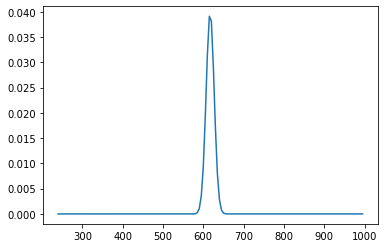

mean: 617 
 sd: 10


In [19]:
# plt.plot(np.convolve(sin_func, norm.pdf(x_axis, mean, sd)))
# len( np.convolve(sin_func, norm.pdf(x_axis, mean, sd)) )

%matplotlib inline

x_axis = np.arange(240, 1000, 5)
### Calculating mean and standard deviation
mean = statistics.mean(x_axis)
# sd = statistics.stdev(x_axis)
### we provide standard deviation as per our requirement
# sd = 5  ; Marcin suggests sd = 5
sd = 10

norm_distr = norm.pdf(x_axis, mean, sd) 
# norm_distr = norm.pdf(x_axis, mean, 50) 
plt.plot(x_axis, norm_distr )
plt.show()

print('mean:', mean, '\n', 'sd:', sd)

<h4 style = "color:orange"> back to  comparison</h4>

<p> new computations with convolution </p>

In [20]:
# R_SiPM_alberto_convolved = np.convolve( R_SiPM_alberto_smooth, norm_distr, 'same')

# %matplotlib inline
# # %matplotlib qt

# fig3 = plt.figure()
# ax3 = plt.axes()

# ax3.plot(wavelength_vector, R_SiPM_alberto_convolved, marker = '*', color = 'lime', label = 'Alberto convolved' )
# ax3.plot(wavelength_vector, R_SiPM_alberto_smooth, marker = '*', color = 'red', label = 'Alberto data' )
# ax3.plot(wavelength_vector, R_SiPM_measured_smooth, marker = '*', color = 'blue', label = 'Measurements' )

# ax3.plot(wavelength_vector, norm_distr, marker = '*', color = 'teal', label ='Normal distribution ')
# ax3.set_yscale('log')
# fig3.set_facecolor('grey')
# ax3.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
# ax3.set_xlabel('Wavelength in nm from 240 to 1000')
# ax3.set_ylabel('Reflectance in %')
# ax3.grid()
# ax3.legend()

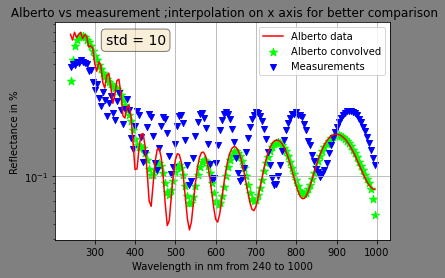

In [21]:
### Normalization to achieve sum of all bins on y axis  = 1 (Marcin)

R_SiPM_alberto_7_convolved = np.convolve(  R_SiPM_alberto_7_smooth, norm_distr/sum(norm_distr), 'same')

%matplotlib inline
# %matplotlib qt

fig3 = plt.figure()
ax3 = plt.axes()

ax3.scatter(wavelength_vector, R_SiPM_alberto_7_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved' )
ax3.plot(wavelength_vector,  R_SiPM_alberto_7_smooth, color = 'red', label = 'Alberto data' )
ax3.scatter(wavelength_vector, R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )
# ax3.scatter(x_axis, norm_distr/sum(norm_distr), color = 'teal', label ='Normal distribution ')
ax3.set_yscale('log')
fig3.set_facecolor('grey')
ax3.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
ax3.set_xlabel('Wavelength in nm from 240 to 1000')
ax3.set_ylabel('Reflectance in %')
ax3.grid()

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
txtstr = 'std = ' + str(sd)
ax3.text(0.15, 0.95, txtstr, transform=ax3.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax3.legend()

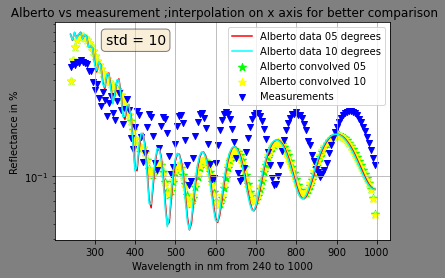

In [22]:
### over plotting reflectances for 5 and 10 degrees.

%matplotlib inline
# %matplotlib qt

fig4 = plt.figure()
ax4 = plt.axes()
## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['05'] , marker = 'o', facecolor = 'none', edgecolor = 'blue')
## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['10'] , marker = '*', facecolor = 'orange', edgecolor = 'none')
## ax4.plot( wavelength_vector, R_SiPM_alberto_05_smooth )
## ax4.plot( wavelength_vector, R_SiPM_alberto_10_smooth )

R_SiPM_alberto_05_convolved = np.convolve( R_SiPM_alberto_05_smooth, norm_distr/sum(norm_distr), 'same')
R_SiPM_alberto_10_convolved = np.convolve( R_SiPM_alberto_10_smooth, norm_distr/sum(norm_distr), 'same')

ax4.plot(wavelength_vector, R_SiPM_alberto_05_smooth, color = 'red', label = 'Alberto data 05 degrees' )
ax4.plot(wavelength_vector, R_SiPM_alberto_10_smooth, color = '#00FFFF', label = 'Alberto data 10 degrees' )
# ax4.plot(wavelength_vector, R_SiPM_alberto_7_smooth, color = 'red', label = 'Alberto data 7 degrees incident' )

ax4.scatter(wavelength_vector, R_SiPM_alberto_05_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 05' )
ax4.scatter(wavelength_vector, R_SiPM_alberto_10_convolved, marker = '*', s = 70, color = 'yellow', label = 'Alberto convolved 10' )
# ax4.scatter(wavelength_vector, R_SiPM_alberto_7_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 7' )

ax4.scatter(wavelength_vector, R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )
# ax4.scatter(x_axis, norm_distr/sum(norm_distr), color = 'teal', label ='Normal distribution ')
ax4.set_yscale('log')
fig4.set_facecolor('grey')
ax4.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
ax4.set_xlabel('Wavelength in nm from 240 to 1000')
ax4.set_ylabel('Reflectance in %')
ax4.grid()
# ax3.legend()
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
txtstr = 'std = ' + str(sd)
ax4.text(0.15, 0.95, txtstr, transform=ax4.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax4.legend()

<h4 style = 'color: Cyan'> Average reflectance over angle from 0 to 90 angles</h4>
<p> Shouldn't we account for how light bounces around in the integrating sphere  before exiting it</p>

In [23]:
# R_SiPM_alberto_avg

R_SiPM_alberto_avg = pd.DataFrame()

R_SiPM_alberto_avg['Wavelength'] = R_SiPM_alberto_df['Wavelength']

R_SiPM_alberto_avg['avg'] =  R_SiPM_alberto_df.iloc[:,1:].mean(axis=1)

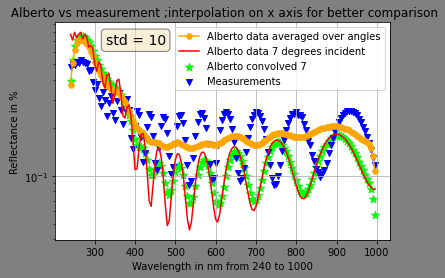

In [24]:
### here I convolve and plot for average of all angles from 0 to 90 

%matplotlib inline
# %matplotlib qt

fig4 = plt.figure()
ax4 = plt.axes()
## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['05'] , marker = 'o', facecolor = 'none', edgecolor = 'blue')
## ax4.scatter(R_SiPM_alberto_df['Wavelength'], R_SiPM_alberto_df['10'] , marker = '*', facecolor = 'orange', edgecolor = 'none')
## ax4.plot( wavelength_vector, R_SiPM_alberto_05_smooth )
## ax4.plot( wavelength_vector, R_SiPM_alberto_10_smooth )
R_SiPM_alberto_avg_inter_func = interp1d( R_SiPM_alberto_avg['Wavelength'], R_SiPM_alberto_avg['avg'] )
R_SiPM_alberto_avg_smooth = R_SiPM_alberto_avg_inter_func(wavelength_vector)

R_SiPM_alberto_avg_convolved = np.convolve( R_SiPM_alberto_avg_smooth, norm_distr/sum(norm_distr), 'same')

## R_SiPM_alberto_05_convolved = np.convolve( R_SiPM_alberto_05_smooth, norm_distr/sum(norm_distr), 'same')
## R_SiPM_alberto_10_convolved = np.convolve( R_SiPM_alberto_10_smooth, norm_distr/sum(norm_distr), 'same')

ax4.plot(wavelength_vector, R_SiPM_alberto_avg_convolved, color = 'orange', marker ='H', label = 'Alberto data averaged over angles' )

## ax4.plot(wavelength_vector, R_SiPM_alberto_05_smooth, color = 'red', label = 'Alberto data 05 degrees' )
## ax4.plot(wavelength_vector, R_SiPM_alberto_10_smooth, color = '#00FFFF', label = 'Alberto data 10 degrees' )

ax4.plot(wavelength_vector, R_SiPM_alberto_7_smooth, color = 'red', label = 'Alberto data 7 degrees incident' )

## ax4.scatter(wavelength_vector, R_SiPM_alberto_05_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 05' )
## ax4.scatter(wavelength_vector, R_SiPM_alberto_10_convolved, marker = '*', s = 70, color = 'yellow', label = 'Alberto convolved 10' )

ax4.scatter(wavelength_vector, R_SiPM_alberto_7_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 7' )

ax4.scatter(wavelength_vector, R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )

# ax4.scatter(x_axis, norm_distr/sum(norm_distr), color = 'teal', label ='Normal distribution ')
ax4.set_yscale('log')
fig4.set_facecolor('grey')
ax4.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
ax4.set_xlabel('Wavelength in nm from 240 to 1000')
ax4.set_ylabel('Reflectance in %')
ax4.grid()
# ax3.legend()
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
txtstr = 'std = ' + str(sd)
ax4.text(0.15, 0.95, txtstr, transform=ax4.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax4.legend()

<h3 style = 'color: magenta'> Step function as slit function</h3>

In [25]:
def step_function(step_size, x_distribution):
    initial_step = x_distribution.mean()
    next_step = initial_step + step_size
    y_value = []
    for x_value in x_distribution:
        if (x_value > initial_step) & (x_value < next_step)  :
            y_value.append(1)
        else :
            y_value.append(0)
    return np.array(y_value)

<h4 style = 'color: magenta'> Is this right strategy to convolve two functions? </h4>

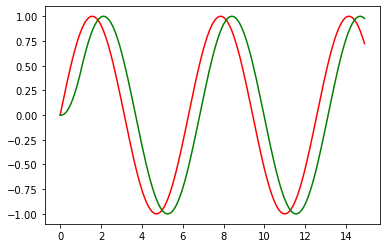

In [26]:
%matplotlib inline
plt.figure()
my_X = np.arange(0, 15,0.1)
my_Y = np.sin(my_X)
slit_func = step_function( 1, my_X)
plt.plot( my_X, my_Y, '-r')
plt.plot( my_X, np.convolve( my_Y, slit_func, 'same')/max(np.convolve( my_Y, slit_func, 'same') ) , '-g')
# plt.plot( my_X, np.convolve( my_Y, slit_func, 'same') , '-b')

In [27]:
slit_width = 7
slit_function = step_function(slit_width, wavelength_vector)

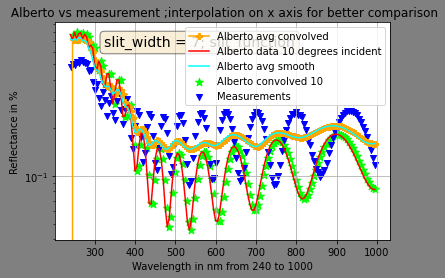

In [28]:
%matplotlib inline
# %matplotlib qt

fig6 = plt.figure()
ax6 = plt.axes()

### careating smooth distributions
R_SiPM_alberto_avg_inter_func = interp1d( R_SiPM_alberto_avg['Wavelength'], R_SiPM_alberto_avg['avg'] )
R_SiPM_alberto_avg_smooth = R_SiPM_alberto_avg_inter_func(wavelength_vector)

### normalization
### convolution
R_SiPM_alberto_avg_convolved = max(R_SiPM_alberto_avg_smooth)*np.convolve( R_SiPM_alberto_avg_smooth, slit_function, 'same')/max(np.convolve( R_SiPM_alberto_avg_smooth, slit_function, 'same'))
R_SiPM_alberto_10_convolved = max( R_SiPM_alberto_10_smooth)* np.convolve( R_SiPM_alberto_10_smooth, slit_function, 'same')/max(np.convolve( R_SiPM_alberto_10_smooth, slit_function, 'same'))

### plotting
ax6.plot(wavelength_vector, R_SiPM_alberto_avg_convolved, color = 'orange', marker ='P', label = 'Alberto avg convolved' )


ax6.plot(wavelength_vector, R_SiPM_alberto_10_smooth, color = 'red', label = 'Alberto data 10 degrees incident' )
ax6.plot(wavelength_vector, R_SiPM_alberto_avg_smooth, color = 'cyan', label = 'Alberto avg smooth' )


ax6.scatter(wavelength_vector, R_SiPM_alberto_10_convolved, marker = '*', s = 70, color = 'lime', label = 'Alberto convolved 10' )

ax6.scatter(wavelength_vector, R_SiPM_measured_smooth, marker = 'v', color = 'blue', label = 'Measurements' )

ax6.set_yscale('log')
fig6.set_facecolor('grey')
ax6.set_title(' Alberto vs measurement ;interpolation on x axis for better comparison')
ax6.set_xlabel('Wavelength in nm from 240 to 1000')
ax6.set_ylabel('Reflectance in %')
ax6.grid()
# ax3.legend()
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
txtstr = 'slit_width = ' + str(slit_width) +'; '+ 'slit_function'
ax6.text(0.15, 0.95, txtstr, transform=ax4.transAxes, fontsize=14, verticalalignment='top', bbox=props)
ax6.legend()